# 2. Preprocess - 데이터 준비하기, 데이터 정보 들여다보기

: 데이터는 , 같은 경로의 -> dataset에 -> mnist.png->training/testing이 있고 -> 각 label별로 data가 묶여져 있다. 

## 1) 데이터 가져오기

In [2]:
import os
from glob import glob 

import numpy as np

import tensorflow as tf
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
os.getcwd() #현재 어느경로에 있는지를 알려줌

'/Users/jeonghyeonjeong/for github/인공지능_딥러닝_패스트캠퍼스/3. 이미지 분석으로 배우는 tensorflow 2.0 와 Pytorch'

In [12]:
os.listdir('./dataset/mnist_png/training/0/') #listdir : 경로를 넣으면 현재 경로에 어떤 파일과 폴더가 있는지를 알려줌

['16585.png',
 '24537.png',
 '25629.png',
 '20751.png',
 '34730.png',
 '15926.png',
 '22152.png',
 '35348.png',
 '22634.png',
 '6819.png',
 '32427.png',
 '24245.png',
 '33739.png',
 '44599.png',
 '12907.png',
 '38644.png',
 '28457.png',
 '40099.png',
 '49903.png',
 '26308.png',
 '28325.png',
 '29985.png',
 '31112.png',
 '25167.png',
 '1179.png',
 '46371.png',
 '9257.png',
 '10645.png',
 '18219.png',
 '4773.png',
 '56176.png',
 '19649.png',
 '55457.png',
 '41350.png',
 '48412.png',
 '54985.png',
 '18543.png',
 '38693.png',
 '29211.png',
 '36331.png',
 '22344.png',
 '43976.png',
 '7911.png',
 '41807.png',
 '16787.png',
 '23728.png',
 '7905.png',
 '32625.png',
 '22436.png',
 '13833.png',
 '57917.png',
 '29205.png',
 '22378.png',
 '52847.png',
 '27200.png',
 '39758.png',
 '38446.png',
 '88.png',
 '55682.png',
 '9914.png',
 '31310.png',
 '5690.png',
 '41191.png',
 '31476.png',
 '46826.png',
 '35823.png',
 '4565.png',
 '48638.png',
 '4203.png',
 '14153.png',
 '34283.png',
 '9733.png',
 '6400

In [13]:
data_paths = glob('./dataset/mnist_png/training/*/*.png') # /*/*.png라고 함은, png가 포함(이런 공통점이 있는)된 *(모든) 파일만 불러옴

In [14]:
data_paths[-1]

'./dataset/mnist_png/training/5/37552.png'

In [15]:
#데이터 하나만 가져와서 데이터 확인(분석) 해 봄
data = data_paths[0]

## 2) 데이터 분석

In [30]:
label_nums = os.listdir('./dataset/mnist_png/training/')
label_nums

['9', '0', '7', '6', '1', '8', '4', '3', '2', '5']

In [31]:
#데이터 별 갯수 비교
nums_dataset = []

for n in label_nums : 
    data_per_class = os.listdir('./dataset/mnist_png/training/' + n)
    nums_dataset.append (len(data_per_class))

In [32]:
nums_dataset

[5949, 5923, 6265, 5918, 6742, 5851, 5842, 6131, 5958, 5421]

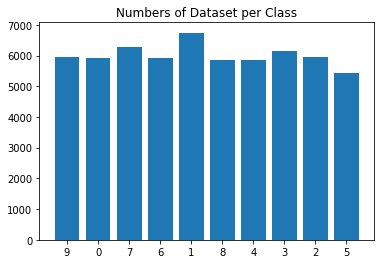

In [33]:
#시각화
plt.bar(label_nums, nums_dataset)
plt.title('Numbers of Dataset per Class')
plt.show()

## 3-1) 이미지 pillow로 열기

In [36]:
data #앞에서 #데이터 하나만 가져와서 데이터 확인(분석) 해  봄 data = data_paths[0]

'./dataset/mnist_png/training/9/36655.png'

In [37]:
image_pil = Image.open(data) #pillow로 이미지 불러와서 연다. 

In [38]:
image = np.array(image_pil)

In [39]:
image.shape

(28, 28)

<function matplotlib.pyplot.show(*args, **kw)>

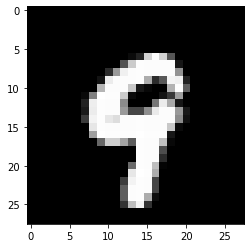

In [40]:
plt.imshow(image, 'gray')
plt.show

## 3-2) 이미지 tensorflow로 열기

In [42]:
gfile = tf.io.read_file(data) # tf.io.read_file로 일단 파일을 연다 
image = tf.io.decode_image(gfile) #tf.io.decode_image 해준다. 

In [44]:
image.shape #channel이 미리 하나 추가되어 시작한다. (3차원디폴트로 시작)

TensorShape([28, 28, 1])

## 4. Label 얻기

In [46]:
data #Label이 폴더명 (정답이 폴더명이다. ) 이걸 어떻게 가져오면 될까? -> String method 사용 

'./dataset/mnist_png/training/9/36655.png'

Label이 폴더명 (정답이 폴더명이다. ) 이걸 어떻게 가져오면 될까? -> String method 사용 
=>'./dataset/mnist_png/training/9/36655.png' 에서 '/'을 기준으로 split

In [49]:
data.split('/')

['.', 'dataset', 'mnist_png', 'training', '9', '36655.png']

In [48]:
data.split('/')[-2] #split한 것의 마지막에서 두번째 것! 이 label

'9'

In [51]:
label = data.split('/')[-2]
int(label) #여기서 label은 string이니까 진짜 int로 바꿔준다 

9

In [54]:
#이렇에 label을 얻는 함수 만들기
def get_label(data) : 
    class_name = data.split('/')[-2]
    label = int(class_name)
    return label

In [55]:
data, get_label(data)

('./dataset/mnist_png/training/9/36655.png', 9)

## 5. 데이터 이미지 사이즈 알기

In [56]:
#input 데이터 이미지의 크기를 통일시켜주어야 한다. 
from tqdm import tqdm_notebook #진행상황을 보여주는 라이브러리

In [57]:
heights = []
widths = []

In [59]:
data_paths[:10]

['./dataset/mnist_png/training/9/36655.png',
 './dataset/mnist_png/training/9/32433.png',
 './dataset/mnist_png/training/9/28319.png',
 './dataset/mnist_png/training/9/4968.png',
 './dataset/mnist_png/training/9/23502.png',
 './dataset/mnist_png/training/9/37211.png',
 './dataset/mnist_png/training/9/51194.png',
 './dataset/mnist_png/training/9/374.png',
 './dataset/mnist_png/training/9/27016.png',
 './dataset/mnist_png/training/9/5492.png']

In [60]:
len(data_paths)

60000

In [64]:
for data in tqdm_notebook(data_paths):
    img_pil = Image.open(data)
    image = np.array(img_pil)#pillow로 이미지 열기
    height, width = image.shape
    
    heights.append(height)
    widths.append(width)

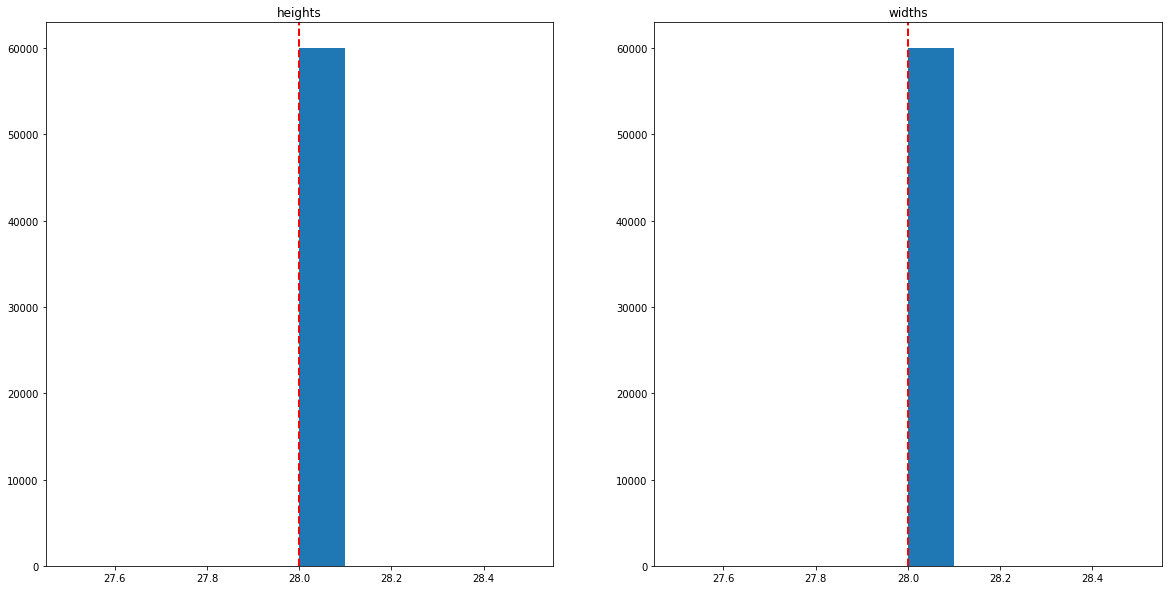

In [68]:
#시각화
plt.figure(figsize = (20, 10))

plt.subplot(1,2,1)
plt.hist(heights)
plt.title('heights')
plt.axvline(np.mean(heights), color = 'red', linestyle = 'dashed', linewidth = 2) #평균값 선 긋기

plt.subplot(1, 2, 2)
plt.hist(widths)
plt.title('widths')
plt.axvline(np.mean(widths), color = 'red', linestyle = 'dashed', linewidth = 2)  #평균값 선 긋기
